In [1]:
import os
from ultralytics import YOLO

In [2]:
os.chdir('../')
%pwd

'/Users/apple/Documents/Personal/Computer Vision and Deep Learning/card-reader-ml'

In [3]:
model = YOLO('model/detection.pt')

In [22]:
result = model.predict('data/train/82.jpg')

image 1/1 /Users/apple/Documents/Personal/Computer Vision and Deep Learning/card-reader-ml/data/train/82.jpg: 640x480 1 flag, 1 gender, 1 heading, 4 ic_numbers, 3 mykids, 1 mykid_icon, 7 names, 339.7ms
Speed: 14.8ms preprocess, 339.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


In [23]:
classes = ['address', 'flag', 'gender', 'heading', 'ic_number', 'level', 'mykad', 'mykad_icon', 'mykid', 'mykid_icon', 'name', 'religion']
# result

In [24]:

# for res in result:
#   boxes = res.boxes
#   for box in boxes:
#     print(box)


0: 640x480 1 flag, 1 heading, 3 ic_numbers, 1 level, 5 mykids, 1 mykid_icon, 6 names, 175.3ms
Speed: 26.6ms preprocess, 175.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


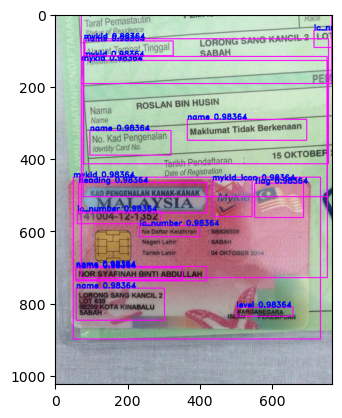

In [26]:
# Visualize

import cv2 as cv
from matplotlib import pyplot as plt

ic = cv.imread('data/train/82.jpg')
ic = cv.cvtColor(ic, cv.COLOR_BGR2RGB)
result = model.predict(ic)
for res in result:
  boxes = res.boxes
  for box in boxes:
    x1, y1, x2, y2 = box.xyxy[0]
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    cv.rectangle(ic, (x1, y1), (x2, y2), (255, 0, 255), 2)
    cls = int(box.cls[0])
    cls = classes[cls]
    conf = round(boxes.conf[0].item(), 5)
    cv.putText(ic, f"{cls} {conf}", (x1, y1), 2, 0.7, (0, 0, 255), 2)

plt.imshow(ic)
plt.show()